NOTE: Added my own method (add_text_overlay) into microanim

`conda activate imgpro`

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'D:\DATA\g5ht-free\20251223'
FN = 'date-20251223_strain-ISg5HT_condition-starvedpatch_worm005.h5'

f = h5py.File(os.path.join(PTH,FN))

im = f.get('img_nir')[:] # THW
sz = im.shape

fps = 20.0  # frames per second


In [5]:
im.shape # save as movie with 20 fps

(12826, 732, 968)

In [ ]:
# add color channel
im = im[np.newaxis,...]  # shape (1, T, H, W)

In [ ]:
im.shape

In [ ]:
nframes = im.shape[1]
record_duration = nframes / fps # in seconds

In [ ]:
record_duration

In [ ]:
microshow(
    images=im[:,11000,:,:], cmaps=['gray'], flip_map=False, fig_scaling=5, dpi=300, rescale_type='limits', limits=[0,275])
plt.show()

# SAVE MOVIE

In [ ]:

# save every nth frame
n = 10
save_im = im[:,::n,:,:]

time = np.arange(0, nframes, n) / fps  # in seconds
time_str = [str(np.round(x,3)) + ' sec' for x in time]

# time = np.arange(0, nframes) / fps  # in seconds
# time_str = [str(np.round(x,3)) + ' sec' for x in time]


fig, ax = plt.subplots()

anim = Microanim(
    save_im,
    cmaps=['gray'],
    flip_map=False,
    fig_scaling=5,
    dpi=300,
    rescale_type='limits',
    limits=[0,275],
    ax=ax
)

anim.add_text_overlay(time_str, xpos=0.02, ypos=0.93, color='yellow', fontsize=14)

anim_output = r"C:\Users\munib\POSTDOC\DATA\g5ht-free\20251223\date-20251223_strain-ISg5HT_condition-starvedpatch_worm005\behav_vids\nir.mp4"
anim.save_movie(anim_output, quality=7, fps=10)


# calculate motion energy

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251223'
FN = 'date-20251223_strain-ISg5HT_condition-starvedpatch_worm005.h5'

f = h5py.File(os.path.join(PTH,FN))

im = f.get('img_nir')[:] # THW
sz = im.shape

n = 10
me_im = im[::n,:,:]

fps = 20.0  # frames per second
nframes = me_im.shape[0]


In [ ]:
# # calculate motion energy of the NIR channel
# # it's defined as the 99th percentile of the absolute difference between consecutive frames, should be one value per frame
# motion_energy = np.percentile(np.abs(np.diff(im, axis=1)), 50, axis=(2,3))
# motion_energy.shape

In [15]:
import tqdm
# calculate motion energy (slow)
# it's defined as the 50th percentile of the absolute difference between the median of the previous N frames and the next N frames,the beginning and ends should be handled properly

motion_energy = np.zeros((nframes-1,))

N = 5  # number of frames to consider before and after
for i in tqdm.tqdm(range(1, nframes-1)):
    start_prev = max(0, i-N)
    end_prev = i
    start_next = i+1
    end_next = min(nframes, i+1+N)
    
    median_prev = np.median(me_im[start_prev:end_prev, :, :], axis=0)
    median_next = np.median(me_im[start_next:end_next, :, :], axis=0)
    
    motion_energy[i] = np.percentile(np.abs(median_next - median_prev), 90)

motion_energy.shape
   

100%|██████████| 1281/1281 [00:46<00:00, 27.56it/s]


(1282,)

(1283,)


Text(0, 0.5, 'Motion energy (a.u)')

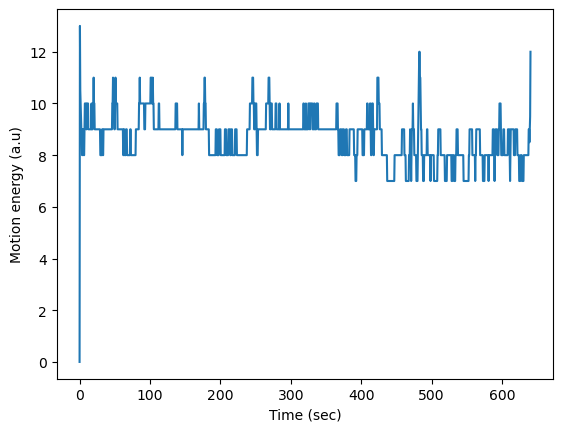

In [17]:
time = np.arange(0, nframes) / fps  # in seconds
print(time.shape)

plt.figure()
plt.plot(time[0:-1]*n, motion_energy.T)
plt.xlabel('Time (sec)')
plt.ylabel('Motion energy (a.u)')

In [12]:
time.shape

(129,)

# distance to patch code

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'C:\Users\munib\POSTDOC\DATA\foodpatch_confocal_gui\20251120'
FN = 'date-20251120_grid-100um_condition-testTrackingDistanceToCoords_002.h5'

f = h5py.File(os.path.join(PTH,FN))

im = f.get('img_nir')[:] # THW
sz = im.shape

d2p = f.get('dist2patch_mm')[:]

In [ ]:
%matplotlib widget

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.figure(figsize=(5,3), constrained_layout=True)
plt.plot(d2p,lw=2)
plt.xlabel('Frame')
plt.ylabel('Distance from food (mm)')
plt.savefig(r'C:\Users\munib\Downloads\d2p.png', dpi=300)
plt.tight_layout
plt.show()


In [ ]:
# add color channel
im = np.stack([im, im], axis=0)

In [ ]:
im.shape

In [ ]:
im[1,:,:,:] = 0

ls = 7

redixH = np.arange(sz[2]//2-ls,sz[2]//2+ls)
redixW = np.arange(sz[1]//2-ls,sz[1]//2+ls)
redixH2 = np.arange(sz[2]//2+ls,sz[2]//2-ls,-1)

im[1,:,redixW,redixH] = 255
im[1,:,redixW,redixH2] = 255

im[1,:,:,:] = dilation(im[1,:,:,:])

In [ ]:
im = im[:,0:643,:,:]
im.shape

In [ ]:
microshow(
    images=im[:,0,:,:], cmaps=['gray','red'], flip_map=False, fig_scaling=3, dpi=72)
plt.show()

In [ ]:
d = d2p   # values to overlay
dstr = [str(np.round(x,3)) + ' mm from patch' for x in d]

fig, ax = plt.subplots()

anim = Microanim(
    im,
    cmaps=['gray','red'],
    flip_map=False,
    fig_scaling=5,
    dpi=300,
    rescale_type='limits',
    limits=[0,256],
    ax=ax
)

anim.add_text_overlay(dstr, xpos=0.02, ypos=0.93, color='yellow', fontsize=14)

anim_output = r"C:\Users\munib\POSTDOC\DATA\foodpatch_confocal_gui\20251120\date-20251120_grid-100um_condition-testTrackingDistanceToCoords_002\d2p.mp4"
anim.save_movie(anim_output, quality=10, fps=10)


# plot a single frame

In [55]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'D:\DATA\g5ht-free\20251223'
FN = 'date-20251223_strain-ISg5HT_condition-starvedpatch_worm005.h5'

f = h5py.File(os.path.join(PTH,FN))

im = f.get('img_nir')[:] # THW
sz = im.shape

fps = 20.0  # frames per second

with h5py.File(os.path.join(PTH,FN)) as f:
    # print(list(f.keys()))

    pos_stage = f.get('pos_stage')[:]  # shape (T, 2) , in microns
    pos_feature = f.get('pos_feature')[:]  # shape (T, 3, 3) , in microns. (time, x/y/conf, feat)

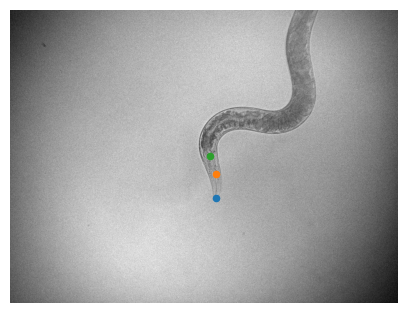

In [62]:
# plot a single frame with the pos_feature overlayed
plt.figure(figsize=(5,5))
plt.imshow(im[0], cmap='gray')
# overlay pos_feature for the first frame
plt.scatter(pos_feature[0,0,0], pos_feature[0,1,0], s=20)
plt.scatter(pos_feature[0,0,1], pos_feature[0,1,1], s=20)
plt.scatter(pos_feature[0,0,2], pos_feature[0,1,2], s=20)
# turn off the axes
plt.axis('off')
# save as svg
plt.savefig(r'C:\Users\munib\Downloads\pos_feature_overlay.svg', dpi=300)
plt.show()


# worm position and speed

In [7]:
# microscope stage speed as proxy for worm speed

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import hdf5plugin
import h5py

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage

from skimage.morphology import dilation


PTH = r'D:\DATA\g5ht-free\20251223'
FN = 'date-20251223_strain-ISg5HT_condition-starvedpatch_worm005.h5'

f = h5py.File(os.path.join(PTH,FN))

conf_thresh = 0.95

In [8]:
with h5py.File(os.path.join(PTH,FN)) as f:
    # print(list(f.keys()))

    pos_stage = f.get('pos_stage')[:]  # shape (T, 2) , in microns
    pos_feature = f.get('pos_feature')[:]  # shape (T, 3, 3) , in microns. (time, x/y/conf, feat)

In [9]:
pos_feature.shape

(12826, 3, 3)

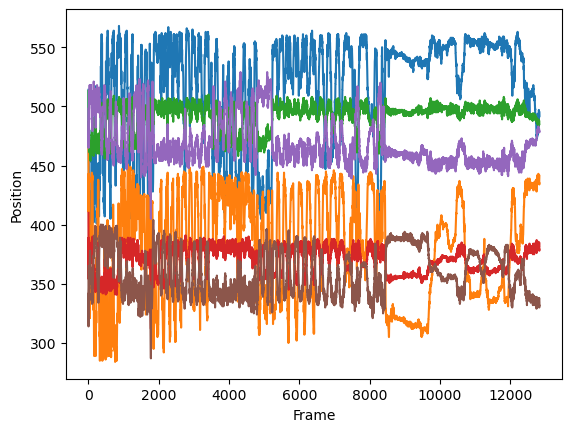

In [10]:
plt.figure()
plt.plot(pos_feature[:,0:2,0]) # nose x/y
plt.plot(pos_feature[:,0:2,1]) # head x/y
plt.plot(pos_feature[:,0:2,2]) # pharynx x/y
plt.xlabel('Frame')
plt.ylabel('Position')
plt.show()

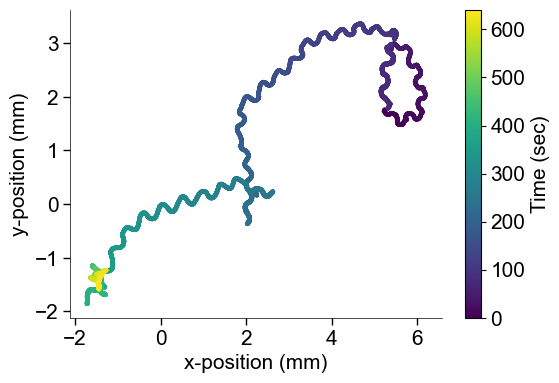

In [68]:
# plot stage position, color by time
import utils

plt, ax = utils.pretty_plot()
sc = ax.scatter(pos_stage[:,0]/10000, pos_stage[:,1]/10000, c=np.arange(pos_stage.shape[0]) / fps, cmap='viridis', s=5)
ax.set_xlabel('x-position (mm)')
ax.set_ylabel('y-position (mm)')
# time colorbar (provide the scatter mappable)
cbar = plt.colorbar(sc, label='Time (sec)')
# save as svg
plt.savefig(r'C:\Users\munib\Downloads\trajectory.svg', dpi=300)
plt.show()

In [69]:
# calculate 1 second moving average speed from pos_stage

# speed = np.zeros(pos_stage.shape[0]-1)
# window_size = int(fps)  # number of frames in 1 second
# for i in range(len(speed)):
#     start = max(0, i - window_size//2)
#     end = min(len(pos_stage)-1, i + window_size//2)
#     diffs = np.diff(pos_stage[start:end+1]/10000, axis=0)  # shape (window_size-1, 2)
#     distances = np.sqrt(diffs[:,0]**2 + diffs[:,1]**2)  # in mm
#     time_diffs = (end - start) / fps  # in seconds
#     speed[i] = np.sum(distances) / time_diffs  # in mm per second

diffs = np.diff(pos_stage/10000, axis=0)  # shape (T-1, 2)
distances = np.sqrt(diffs[:,0]**2 + diffs[:,1]**2)  # in mm
time_diffs = 1.0 / fps  # in seconds
speed = distances / time_diffs  # in mm per second
speed.shape

# smooth speed with a moving average filter, handle missing values appropriately
window_size = int(fps)*2  # 1 second window
speed_smooth = np.convolve(speed, np.ones(window_size)/window_size, mode='same')
speed_smooth.shape
# handle missing values by interpolation   
speed_interp = np.interp(np.arange(len(speed)), np.arange(len(speed))[~np.isnan(speed)], speed[~np.isnan(speed)])
speed_smooth_interp = np.convolve(speed_interp, np.ones(window_size)/window_size, mode='same')
speed_smooth_interp.shape


(12825,)

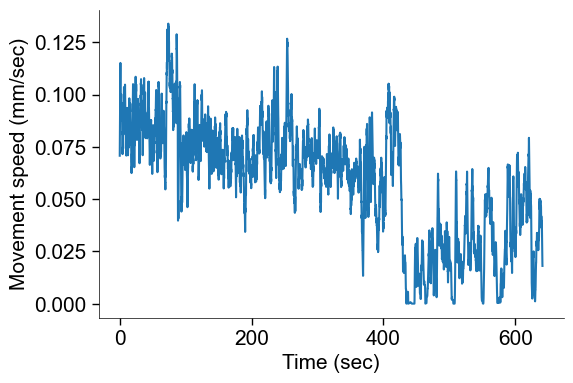

In [70]:
import utils
import importlib
_ = importlib.reload(utils)
# # change font to arial
# plt.rcParams['font.family'] = 'Arial'
# # change all font sizes
# plt.rcParams.update({'font.size': 15})
# plt.rcParams['svg.fonttype'] = 'none'

plt, ax = utils.pretty_plot()

# plt.figure()
ax.plot(np.arange(len(speed_smooth_interp))/fps, speed_smooth_interp)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Movement speed (mm/sec)')
# save figure so that all elements are editable in adobe illustrator, so not png
plt.savefig(r'C:\Users\munib\Downloads\speed.svg', dpi=300)
plt.show()

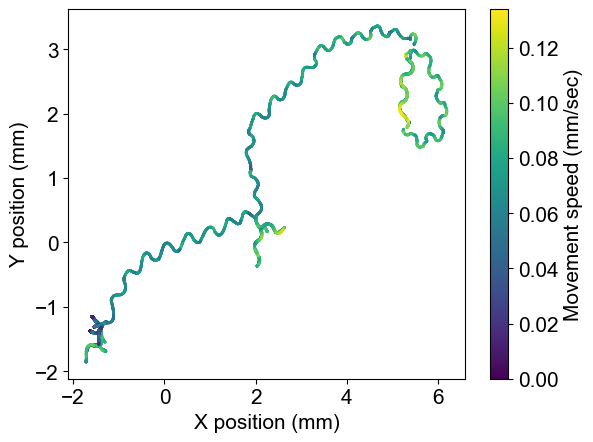

In [53]:
# plot stage position, color by speed
plt.figure()
plt.scatter(pos_stage[:-1,0]/10000, pos_stage[:-1,1]/10000, c=speed_smooth_interp, cmap='viridis', s=1)
plt.xlabel('X position (mm)')
plt.ylabel('Y position (mm)')
plt.colorbar(label='Movement speed (mm/sec)')
# plt.savefig(r'C:\Users\munib\Downloads\speed_color.png', dpi=300
plt.show()

# head angle

In [53]:
# calculate head angle from pos_feature as relative angle between nose-head and head-pharynx vectors
vec_nose_head = pos_feature[:,0:2,1] - pos_feature[:,0:2,0]  # shape (T, 2)
vec_head_pharynx = pos_feature[:,0:2,2] - pos_feature[:,0:2,1]  # shape (T, 2)
dot_products = np.einsum('ij,ij->i', vec_nose_head, vec_head_pharynx)
norms_nose_head = np.linalg.norm(vec_nose_head, axis=1)
norms_head_pharynx = np.linalg.norm(vec_head_pharynx, axis=1)
cos_angles = dot_products / (norms_nose_head * norms_head_pharynx)
head_angles = np.arccos(cos_angles)  # in radians
head_angles.shape

C:\Users\munib\AppData\Local\Temp\ipykernel_36796\3532132361.py:8: RuntimeWarning: invalid value encountered in arccos
  head_angles = np.arccos(cos_angles)  # in radians


(12826,)

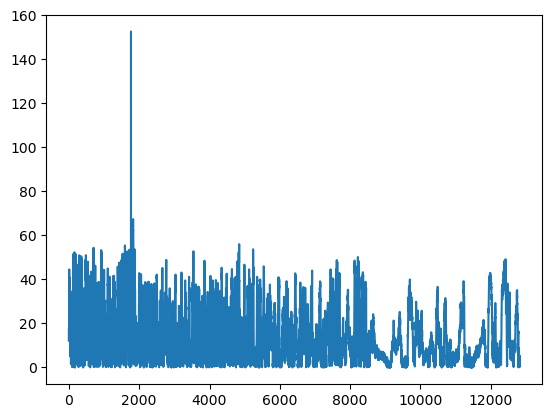

In [55]:
plt.figure()
plt.plot(np.rad2deg(head_angles))
plt.show()

# worm outline

100%|██████████| 100/100 [00:05<00:00, 19.32it/s]


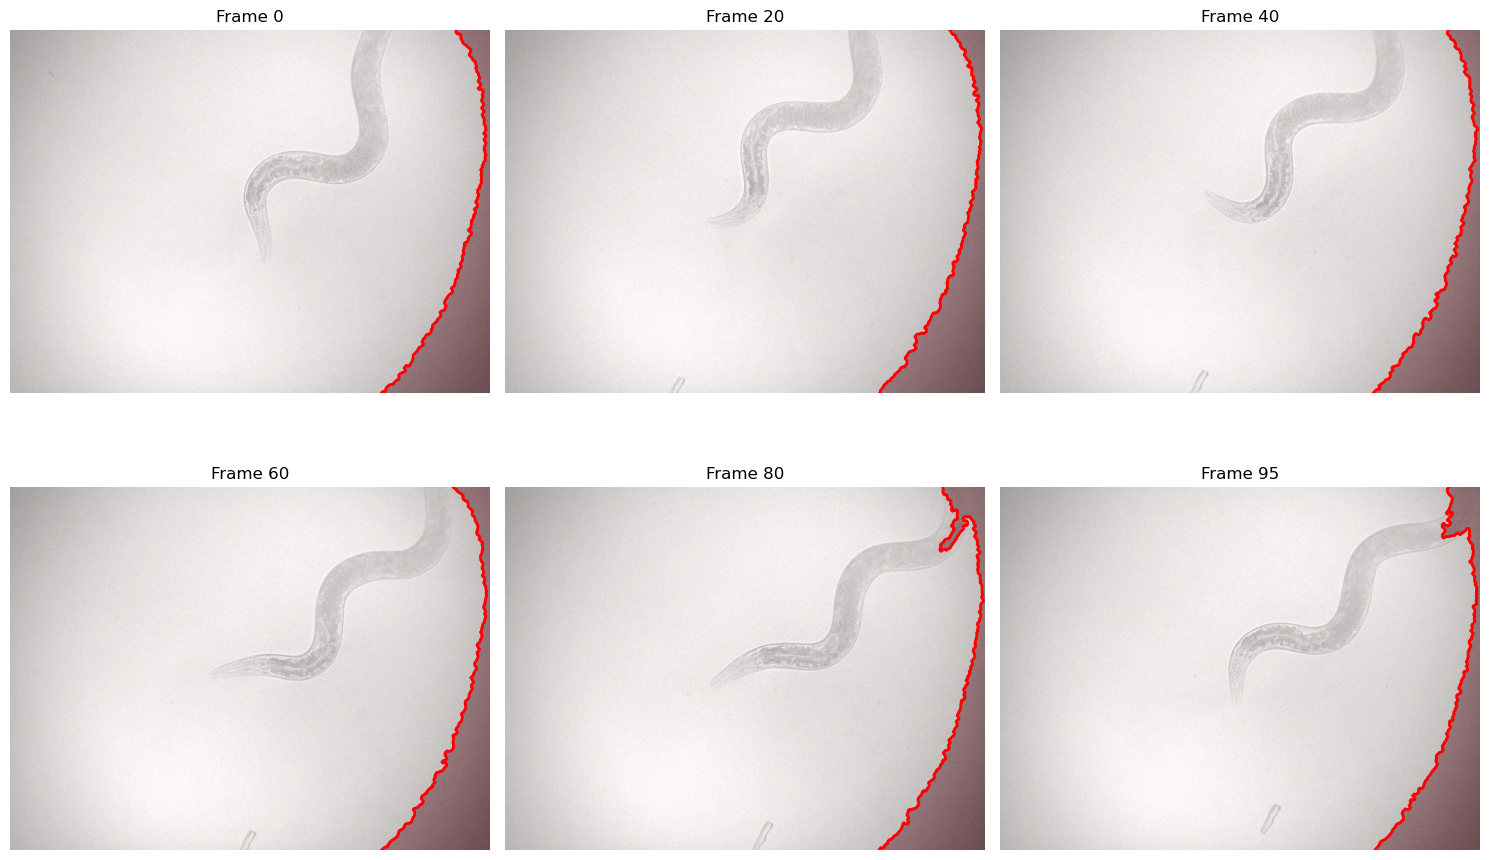

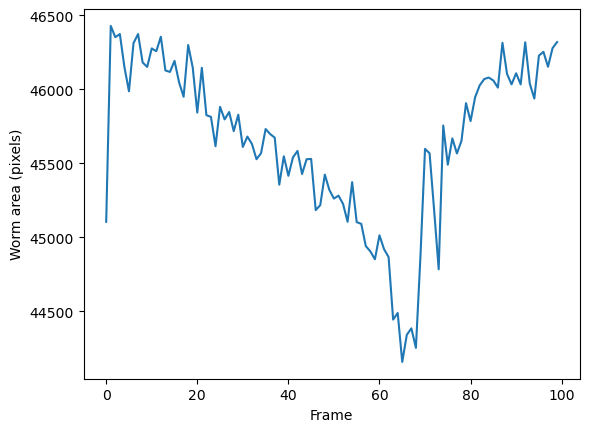

In [68]:
from skimage import filters, morphology, measure
from scipy import ndimage
import tqdm

def get_worm_outlines_improved(im, sigma=2.0, percentile_thresh=15, 
                                 min_size=500, center_weight=True):
    """
    Extract worm outlines for dark worm on bright background.
    
    Parameters:
    -----------
    im : ndarray, shape (T, H, W)
        Image stack
    sigma : float
        Gaussian smoothing sigma (larger = smoother)
    percentile_thresh : float
        Percentile for thresholding (10-15 works well for dark worm on bright background)
    min_size : int
        Minimum object size to keep
    center_weight : bool
        If True, prefer objects near center of frame
    """
    nframes = im.shape[0]
    h, w = im.shape[1], im.shape[2]
    center_y, center_x = h // 2, w // 2
    
    masks = np.zeros_like(im, dtype=bool)
    outlines = []
    
    for t in tqdm.tqdm(range(nframes)):
        frame = im[t].astype(np.float32)
        
        # Smooth
        frame_smooth = filters.gaussian(frame, sigma=sigma)
        
        # Adaptive threshold using percentile - INVERTED for dark objects
        thresh = np.percentile(frame_smooth, percentile_thresh)
        binary = frame_smooth < thresh  # Changed from > to <
        
        # Morphological operations to clean up
        binary = morphology.binary_opening(binary, morphology.disk(2))
        binary = morphology.binary_closing(binary, morphology.disk(3))
        binary = morphology.remove_small_objects(binary, min_size=min_size)
        binary = morphology.remove_small_holes(binary, area_threshold=min_size)
        
        # Get connected components
        labels = measure.label(binary)
        
        if labels.max() > 0:
            regions = measure.regionprops(labels)
            
            if center_weight:
                # Score regions by size and proximity to center
                best_region = None
                best_score = -np.inf
                
                for region in regions:
                    cy, cx = region.centroid
                    dist_to_center = np.sqrt((cy - center_y)**2 + (cx - center_x)**2)
                    # Score: favor large objects near center
                    score = region.area / (1 + dist_to_center / 50)
                    
                    if score > best_score:
                        best_score = score
                        best_region = region
                
                if best_region is not None:
                    binary = (labels == best_region.label)
            else:
                # Just take largest
                largest_region = max(regions, key=lambda r: r.area)
                binary = (labels == largest_region.label)
        
        masks[t] = binary
        
        # Find contours
        contours = measure.find_contours(binary, 0.5)
        if len(contours) > 0:
            outline = max(contours, key=len)
            outlines.append(outline)
        else:
            outlines.append(np.array([]))
    
    return outlines, masks

# Try different parameters for dark worm
outlines, masks = get_worm_outlines_improved(
    im[0:100], 
    sigma=2.0,              # More smoothing
    percentile_thresh=10,   # Try 5-15 for dark objects
    min_size=500,           # Larger minimum size
    center_weight=True      # Prefer center objects
)



In [ ]:
# Visualize multiple frames' masks and outlines
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, t in enumerate([0, 20, 40, 60, 80, 95]):
    ax = axes[i // 3, i % 3]
    ax.imshow(im[t], cmap='gray', vmin=0, vmax=np.percentile(im[t], 99))
    ax.imshow(masks[t], cmap='Reds', alpha=0.3)
    if len(outlines[t]) > 0:
        ax.plot(outlines[t][:, 1], outlines[t][:, 0], 'r-', linewidth=2)
    ax.set_title(f'Frame {t}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Check areas over time
areas = np.array([np.sum(masks[t]) for t in range(masks.shape[0])])
plt.figure()
plt.plot(areas)
plt.xlabel('Frame')
plt.ylabel('Worm area (pixels)')
plt.show()